In [19]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from langchain_groq import ChatGroq
from dotenv import load_dotenv

load_dotenv()
model = ChatGroq(model="llama-3.3-70b-versatile",temperature=0.1)

In [20]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int
    strike_rate: float
    balls_per_boundry: float
    boundry_percentage: float
    summary: str

In [21]:
def calculate_strike_rate(state:BatsmanState):
    strike_rate = (state['runs']/state['balls'])*100
    state['strike_rate']=strike_rate
    return {'strike_rate':strike_rate}

In [22]:
def calculate_balls_per_boundry(state:BatsmanState):
    balls_per_boundry = state['balls']/(state['fours']+state['sixes'])
    state['balls_per_boundry']=balls_per_boundry
    return {'balls_per_boundry':balls_per_boundry}

In [23]:
def calculate_boundry_percentage(state:BatsmanState):
    boundry_percentage = ((state['fours']*4+state['sixes']*6)/state['runs'])*100
    state['boundry_percentage']=boundry_percentage
    return {'boundry_percentage':boundry_percentage}

In [24]:
def summary(state:BatsmanState):
    summary=f"""
    strike rate - {state['strike_rate']} \n
    balls per boundry - {state['balls_per_boundry']} \n
    boundry percentage - {state['boundry_percentage']}
    """

    state['summary']=summary
    return state

In [25]:
graph = StateGraph(BatsmanState)

graph.add_node('calculate_strike_rate',calculate_strike_rate)
graph.add_node('calculate_balls_per_boundry',calculate_balls_per_boundry)
graph.add_node('calculate_boundry_percentage',calculate_boundry_percentage)
graph.add_node('summary',summary)

graph.add_edge(START,'calculate_strike_rate')
graph.add_edge(START,'calculate_balls_per_boundry')
graph.add_edge(START,'calculate_boundry_percentage')

graph.add_edge('calculate_strike_rate','summary')
graph.add_edge('calculate_balls_per_boundry','summary')
graph.add_edge('calculate_boundry_percentage','summary')

graph.add_edge('summary',END)

workflow = graph.compile()

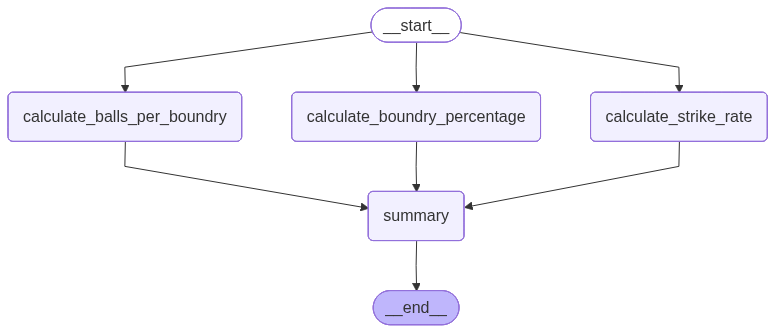

In [26]:
workflow

In [27]:
initial_state = {
    'runs':100,
    'balls':50,
    'fours':6,
    'sixes':4
}

final_state = workflow.invoke(initial_state)
print(final_state)

{'runs': 100, 'balls': 50, 'fours': 6, 'sixes': 4, 'strike_rate': 200.0, 'balls_per_boundry': 5.0, 'boundry_percentage': 48.0, 'summary': '\n    strike rate - 200.0 \n\n    balls per boundry - 5.0 \n\n    boundry percentage - 48.0\n    '}
